In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/home/mauritian/Documents/Git/data-labs/module-2/lab-matplotlib-seaborn/your-code/Fitbit2.csv')

In [3]:
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [4]:
df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

Among all the columns we have in DataFrame (DF), I decided to study what defines the duration of being awake during the night. The first assumption - Number of Awakings. Because it makes so much sense - the more you wake up, the longer you dont sleep during the night

In [5]:
df[['MinutesOfBeingAwake','NumberOfAwakings']]

,MinutesOfBeingAwake,NumberOfAwakings
0,26,23
1,35,21
2,46,25
3,31,21
4,65,44
...,...,...
362,33,18
363,21,8
364,35,15
365,42,22


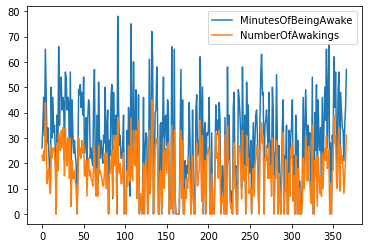

In [6]:
df[['MinutesOfBeingAwake','NumberOfAwakings']].plot()

We can see that when the number of awakings increases - the duration of insomnia as well. Same happens when the number of awakings decrease

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set()

In [9]:
%matplotlib inline

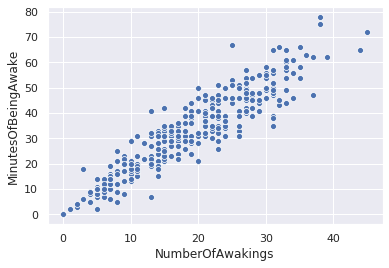

In [10]:
sns.scatterplot(data=df, x='NumberOfAwakings',y='MinutesOfBeingAwake')

We can see clear dependancy

# Modeling

Lets build a model that will predict the average time of us being awake depending on the number of awakings during the night

In [11]:
import statsmodels.api as sm

In [12]:
# OLS object from statsmodels allows us create the OLS model. It has 2 main parameters: endog(y) and exog(X)
sm.OLS(exog=df.NumberOfAwakings, endog=df.MinutesOfBeingAwake)

Endogeneous variable - Dependant variable. (y)

Exogeneous variable - Independant variable (x)

In [13]:
#but we usually define the variables outside of the function. It increases the readability.
# Here we add 1 additional feature Days_encoded. This feature cant bring us any additional important information.
# It was added to show the difference in the output.
y=df.MinutesOfBeingAwake
X=df[['NumberOfAwakings','Days_encoded']]

In [14]:
# Keep in mind the order of y and X. After creating the object of OLS model, we need to fit it.
# Fit is the method that calculates all the parameters and metrics for the model. 
# This method presents in every single library.
model=sm.OLS(y,X).fit()

In [15]:
# Summary method provides us the proper summary of OLS model. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared (uncentered):                   0.971
Model:                             OLS   Adj. R-squared (uncentered):              0.971
Method:                  Least Squares   F-statistic:                              6140.
Date:                 Wed, 29 Apr 2020   Prob (F-statistic):                   1.06e-281
Time:                         15:49:43   Log-Likelihood:                         -1159.8
No. Observations:                  367   AIC:                                      2324.
Df Residuals:                      365   BIC:                                      2331.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
NumberOfAwakings     1.6733      0.021     78.074      0.000       1.631       1.715
Days_encoded         0.2228      0.115      1.933      0.054      -0.004       0.450
==============================================================================
Omnibus:                       12.495   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.694
Skew:                           0.162   Prob(JB):                     1.18e-05
Kurtosis:                       4.174   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this iteration we can see that p_value for Days_encoded feature coefficient is higher than 5%. That shows insignificancy of this parameter for our model.

At the same time summary shows us that R2 and Adjusted R2 are uncentered. That means that we dont have constant in the model. **It is very important to have a constant in the model**. 

In [16]:
# This function simply adds constant to our X (1 column with all values being equal to 1)
from statsmodels.tools.tools import add_constant

In [17]:
# As you can see we have a new column of ones
add_constant(X)

,const,NumberOfAwakings,Days_encoded
0,1.0,23,4.0
1,1.0,21,5.0
2,1.0,25,6.0
3,1.0,21,0.0
4,1.0,44,1.0
...,...,...,...
362,1.0,18,1.0
363,1.0,8,2.0
364,1.0,15,3.0
365,1.0,22,4.0


In [18]:
# Following the same steps we end up in a new model.
y=df.MinutesOfBeingAwake
X=df[['NumberOfAwakings','Days_encoded']]
model=sm.OLS(y,add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                     1754.
Date:                 Wed, 29 Apr 2020   Prob (F-statistic):          1.34e-187
Time:                         15:49:43   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2322.
Df Residuals:                      364   BIC:                             2334.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3012      0.699      1.863      0.063      -0.072       2.675
NumberOfAwakings     1.6404      0.028     59.219      0.000       1.586       1.695
Days_encoded         0.0459      0.149      0.308      0.759      -0.247       0.339
==============================================================================
Omnibus:                       17.007   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.783
Skew:                           0.285   Prob(JB):                     3.41e-07
Kurtosis:                       4.274   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that p_value for Days_encoded is much higher than 0.05, therefore this variable is meaningless for tis analysis. So we drop it

### How do we select features for the model?

There are several ways to do so:
1. Start from 1 feature and iteratively add more features.
2. Start from all features and iteratively remove meaningless ones.
3. Start from correlation matrix and select only those features that are highly correlated with Dependant variable. Remove meaningless ones and iteratively add remaining ones.

In [19]:
df.corr().MinutesOfBeingAwake.sort_values()

Months_encoded               -0.112566
Activity Calories             0.010859
Days_encoded                  0.013195
Work_or_Weekend               0.038051
Calorie burned                0.041999
Floors                        0.064587
Minutes Lightly Active        0.096107
Minutes Fairly Active         0.104303
Minutes Very Active           0.116559
Steps                         0.124846
Distance_miles                0.130447
Distance                      0.130447
Yesterday_sleep_efficiency    0.131307
Yesterday_sleep               0.160424
Minutes Sedentary             0.200589
Sleep efficiency              0.599178
MinutesOfSleep                0.779595
Hours Sleep                   0.779595
LengthOfRestInMinutes         0.820110
NumberOfAwakings              0.951817
MinutesOfBeingAwake           1.000000
Name: MinutesOfBeingAwake, dtype: float64

We can see that 'Sleep efficiency', 'MinutesOfSleep', 'Hours Sleep', 'LengthOfRestInMinutes' and 'NumberOfAwakings' are highly correlated with y. So, we add them. Keep in mind that 'Hours Sleep' can be easily calculated from 'MinutesOfSleep'. Therefore there is no need of adding both features. I selected the one without spaces in the name, haha

In [20]:
y=df.MinutesOfBeingAwake
X=df[['NumberOfAwakings','LengthOfRestInMinutes','MinutesOfSleep']]
model=sm.OLS(y,add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     2327.
Date:                 Wed, 29 Apr 2020   Prob (F-statistic):          1.39e-236
Time:                         15:49:43   Log-Likelihood:                -1040.1
No. Observations:                  367   AIC:                             2088.
Df Residuals:                      363   BIC:                             2104.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3022      0.461     -0.655      0.513      -1.209       0.605
NumberOfAwakings          0.6747      0.058     11.628      0.000       0.561       0.789
LengthOfRestInMinutes     0.5297      0.030     17.385      0.000       0.470       0.590
MinutesOfSleep           -0.5262      0.031    -16.977      0.000      -0.587      -0.465
==============================================================================
Omnibus:                      106.901   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.434
Skew:                          -1.251   Prob(JB):                     1.00e-85
Kurtosis:                       7.398   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the value of AIC and BIC are 300 points less than in previous Simple Linear Regression model. That tells us that the model is way better. (The lower the value, the better). Values of R2 and Adj. R2 are super high, telling us that model is super nice. But...

But we can see that the constant being insignificant. It is an issue. At the same time we see a warning from Statsmodels, noting us on large condition number. Most likely we failed with some assumptions. We will need to fix it.

Btw, when you add more than 1 feature, the model name changes from Simple Linear Regression to Multiple Linear Regression. 

In [21]:
# Here is another way to build the same model. We can use the formula submodule of statsmodels that allows us to 
# create models using text input. It adds constant (Intercept) automatically. And it can handle dummies as well.
# NOTE: DO NOT FALL INTO DUMMIES TRAP. Read an article in the references in the bottom of the file


import statsmodels.formula.api as smf
model=smf.ols('MinutesOfBeingAwake ~ NumberOfAwakings+LengthOfRestInMinutes+MinutesOfSleep',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     2327.
Date:                 Wed, 29 Apr 2020   Prob (F-statistic):          1.39e-236
Time:                         15:49:43   Log-Likelihood:                -1040.1
No. Observations:                  367   AIC:                             2088.
Df Residuals:                      363   BIC:                             2104.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3022      0.461     -0.655      0.513      -1.209       0.605
NumberOfAwakings          0.6747      0.058     11.628      0.000       0.561       0.789
LengthOfRestInMinutes     0.5297      0.030     17.385      0.000       0.470       0.590
MinutesOfSleep           -0.5262      0.031    -16.977      0.000      -0.587      -0.465
==============================================================================
Omnibus:                      106.901   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.434
Skew:                          -1.251   Prob(JB):                     1.00e-85
Kurtosis:                       7.398   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to get predictions, simply call *predict* method of fitted model, providing new rows as argument

In [22]:
y_pred=model.predict(X)

In [23]:
y_pred;

0      34.063221
1      35.081769
2      43.898672
3      35.632242
4      75.329209
         ...    
362    30.664748
363    17.664329
364    29.354801
365    38.106067
366    54.712749
Length: 367, dtype: float64

# Guided Project - What conducts the price of houses?

In [24]:
df=pd.read_csv('/home/mauritian/Documents/housing_prices.csv')

In [25]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

81 columns. Seems to be a lot...

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

43 object variables... We will need to convert them into dummies to be able to use them. Or discretize them (Rank). Or drop them...

In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We already see some outliers. In ideal scenario we need to tackle them separately. But here we dont have enough time. Let's leave them as they are to see what's gonna happen

In [29]:
df.Id.nunique()==df.shape[0]

True

Since Id is unique, it doesnt show us any important information. So drop it.

In [31]:
df.drop('Id',axis=1,inplace=True)

Let's check missing values. We will solve each case separately

In [32]:
missing=df.isna().sum()
missing[missing>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [33]:
# Let's start from the bottom
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [34]:
df.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

These values can describe some of our outliers. Imagine having a house with Tennis court. That should be super expensive house...

For the dummies that contain missing values we don't need to drop 1 column. Since we can have the case when all the values are 0 - missing

In [35]:
dummies_list_NA=['MiscFeature']

In [36]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [37]:
# Obviously we can run hypothesis testing, checking whether SalePrice for houses with different type of Fence
# are significantly different. But it will take a lot of time. (We can't do that for each of 43 columns)
# Simple comparison of Averages shows potential difference. 

df[['Fence','SalePrice']].groupby('Fence').agg('mean')

,SalePrice
Fence,
GdPrv,178927.457627
GdWo,140379.314815
MnPrv,148751.089172
MnWw,134286.363636


In [38]:
dummies_list_NA.append('Fence')

In [39]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [40]:
# Here the value represents the quality of the pool. We can easily order them. Since we have a code book
# we can deduce the order and numerical representations for each value.

dct={'Ex':5, 'Fa':2, 'Gd':4}
df.PoolQC=df.PoolQC.map(dct)
df.PoolQC.fillna(0, inplace=True)

In [41]:
df.PoolQC.value_counts()

0.0    1453
4.0       3
2.0       2
5.0       2
Name: PoolQC, dtype: int64

In [42]:
# Same here
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [43]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.GarageQual=df.GarageQual.map(dct)
df.GarageQual.fillna(0, inplace=True)

In [44]:
# And here
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.GarageCond=df.GarageCond.map(dct)
df.GarageCond.fillna(0, inplace=True)

In [45]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [46]:
# And here
dct={'Fin':3,'RFn':2, 'Unf':1}
df.GarageFinish=df.GarageFinish.map(dct)
df.GarageFinish.fillna(0, inplace=True)

In [47]:
df.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [48]:
# Year when the Garage was built potentially can bring us some information. But is it really important?
# From one point of view we still can categorize it into decades - 2010s, 2000s, 1990s, etc. But let's just drop them
(df.GarageYrBlt==df.YearBuilt).sum()/df.shape[0]

0.7458904109589041

In [49]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [50]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [51]:
dummies_list_NA.append('GarageType')

In [52]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.FireplaceQu=df.FireplaceQu.map(dct)
df.FireplaceQu.fillna(0, inplace=True)

In [53]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
# There is only 1 missing case. We can fill it with the modal value from similar houses.
df[df.Electrical.isna()].T

,1379
MSSubClass,80
MSZoning,RL
LotFrontage,73
LotArea,9735
Street,Pave
...,...
MoSold,5
YrSold,2008
SaleType,WD
SaleCondition,Normal


In [55]:
df[df.Electrical.isna()].YearBuilt

1379    2006
Name: YearBuilt, dtype: int64

In [56]:
# We define similar house within the same category of houses and construction year.
df.query('2004<YearBuilt<2008 & MSSubClass==80').Electrical

1258    SBrkr
1379      NaN
Name: Electrical, dtype: object

In [57]:
df.loc[df.Electrical.isna(),'Electrical']='SBrkr'

In [58]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [59]:
# And yeah, we need to dummy it
dummies_list=['Electrical']

In [60]:
# We have 2 variables that describe the same feature. Dummy them like Pokemons!
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [61]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [62]:
# Doesn't really works. Each type has different impact. And yeah, having 27 dummies is too much...
df[['BsmtFinType1','BsmtFinType2']].apply(lambda x: str(x['BsmtFinType1'])+' '+str(x['BsmtFinType2']),axis=1).unique()

array(['GLQ Unf', 'ALQ Unf', 'ALQ BLQ', 'Unf Unf', 'Rec Unf', 'BLQ Unf',
       'nan nan', 'LwQ Unf', 'Rec ALQ', 'BLQ Rec', 'ALQ LwQ', 'LwQ BLQ',
       'LwQ GLQ', 'BLQ GLQ', 'ALQ Rec', 'Rec BLQ', 'BLQ ALQ', 'GLQ Rec',
       'GLQ LwQ', 'LwQ ALQ', 'Rec LwQ', 'GLQ nan', 'LwQ Rec', 'BLQ LwQ',
       'GLQ ALQ', 'GLQ BLQ', 'ALQ GLQ', 'BLQ BLQ'], dtype=object)

In [64]:
# This is better. 
BsmtFinType_df=df[['BsmtFinType1','BsmtFinType2']].stack().str.get_dummies().sum(level=0)
BsmtFinType_df.columns=['BsmtFinType'+i for i in BsmtFinType_df.columns]

In [116]:
df=pd.concat([df, BsmtFinType_df],axis=1)

In [66]:
# We can rank the values as well.
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [67]:
dct={'Gd':3,'Av':2,'Mn':1}
df.BsmtExposure=df.BsmtExposure.map(dct)
df.BsmtExposure.fillna(0, inplace=True)

In [68]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.BsmtCond=df.BsmtCond.map(dct)
df.BsmtCond.fillna(0, inplace=True)

In [69]:
df.BsmtQual=df.BsmtQual.map(dct)
df.BsmtQual.fillna(0, inplace=True)

In [70]:
# Numerical. Missing value is no Masonry Veneer
df.MasVnrArea.fillna(0,inplace=True)

In [71]:
# None means missing
df.MasVnrType=df.MasVnrType.map({'BrkFace':'BrkFace','Stone':'Stone','BrkCmn':'BrkCmn'})

In [72]:
dummies_list_NA.append('MasVnrType')

In [73]:
# Doesn't really impacts the price
df.drop('Alley',axis=1,inplace=True)

In [74]:
df.LotFrontage.isna().sum()

259

In [75]:
df.LotFrontage.fillna(0,inplace=True)

In [76]:
missing=df.isna().sum()
missing[missing>0]

MasVnrType       872
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
Fence           1179
MiscFeature     1406
dtype: int64

When we use map, values outside the dictionary end up being missing. Few lines below show that effect.

In [77]:
#dumbdf=df[['BsmtFinType1','BsmtFinType2']].apply(lambda x: str(x['BsmtFinType1'])+' '+str(x['BsmtFinType2']),axis=1)

In [78]:
#dumbdf.unique()

In [79]:
#dumbdf=dumbdf.map({'GLQ Unf':1, 'nan nan':2})
#dumbdf.unique()

We still need to tackle the features that have no missing values. 

Since the approach is very similar, no comments will be left until next charpter

In [85]:
df.loc[:,missing==0].columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', '

In [91]:
columns_to_drop=[]

In [92]:
columns_to_drop.append('MSSubClass')

In [93]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [96]:
df.MSZoning=df.MSZoning.map({'FV':'FV','RH':'RH','RL':'RL','RM':'RM'})

In [104]:
MSZoning_df=pd.get_dummies(df['MSZoning'])
MSZoning_df[MSZoning_df.sum(axis=1)==0]=1

In [110]:
MSZoning_df.sum(axis=1).max()

4

In [112]:
MSZoning_df.columns=['MSZoning'+i for i in MSZoning_df]

In [115]:
df=pd.concat([df,MSZoning_df],axis=1)

In [120]:
columns_to_drop.append('Street')

In [122]:
df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [123]:
df.LotShape=df.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [125]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [126]:
dummies_list.append('LandContour')

In [128]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [129]:
df.Utilities=df.Utilities.map({'NoSeWa':1,'AllPub':0})

In [131]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [132]:
dummies_list.append('LotConfig')

In [134]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [136]:
df.LandSlope=df.LandSlope.map({'Gtl':0, 'Mod':1, 'Sev':2})

In [138]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
dummies_list.append('Neighborhood')

In [140]:
df.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [141]:
columns_to_drop.append('Condition1')
columns_to_drop.append('Condition2')


In [143]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [144]:
dummies_list.append('BldgType')

In [146]:
dummies_list.append('HouseStyle')

In [149]:
df.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [152]:
from  datetime import datetime
datetime.now().year

2020

In [153]:
df['Age']=datetime.now().year-df.YearBuilt

In [158]:
df['RemodAdd']=df.eval('YearRemodAdd>YearBuilt').astype(int)

In [159]:
columns_to_drop.extend(['YearRemodAdd','YearBuilt'])

In [161]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [162]:
columns_to_drop.append('RoofStyle')

In [164]:
columns_to_drop.extend(['RoofMatl', 'Exterior1st', 'Exterior2nd'])

In [167]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.ExterQual=df.ExterQual.map(dct)
df.ExterQual.fillna(0, inplace=True)


In [169]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.ExterCond=df.ExterCond.map(dct)
df.ExterCond.fillna(0, inplace=True)

In [ ]:
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],

In [171]:
dummies_list.append('Foundation')

In [181]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [182]:
dummies_list.append('Heating')

In [184]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.HeatingQC=df.HeatingQC.map(dct)
df.HeatingQC.fillna(0, inplace=True)

In [187]:
df.CentralAir=df.CentralAir.map({'Y':1,'N':0})

In [190]:
'Electrical' in dummies_list

True

In [194]:
dct={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
df.KitchenQual=df.KitchenQual.map(dct)
df.KitchenQual.fillna(0, inplace=True)


In [196]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [197]:
txt="""0  Typ
1  Min1
2  Min2
3  Mod
4  Maj1
5  Maj2
6   Sev
7   Sal"""

In [204]:
df.Functional=df.Functional.map({i.split()[1]:i.split()[0] for i in txt.split('\n')})

In [212]:
df.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [213]:
columns_to_drop.append('PavedDrive')

In [220]:
columns_to_drop.append('SaleType')

In [221]:
columns_to_drop.append('SaleCondition')


In [223]:
dummies_list

['Electrical',
 'LandContour',
 'LotConfig',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'Heating']

In [224]:
dummies_list_NA

['MiscFeature', 'Fence', 'GarageType', 'MasVnrType']

In [225]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [233]:
df1=pd.get_dummies(data=df, columns=dummies_list, drop_first=True)

In [234]:
df1.columns[-20:]

Index(['BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall'],
      dtype='object')

In [237]:
df2=pd.get_dummies(data=df1, columns=dummies_list_NA)

In [239]:
df2=df2.drop(columns_to_drop,axis=1)

# Dataset is clean

In [240]:
# We had 81 column. Now we have 115...
df2.shape

(1460, 115)

In [241]:
df2.dtypes

MSZoning               object
LotFrontage           float64
LotArea                 int64
LotShape                int64
Utilities               int64
                       ...   
GarageType_CarPort      uint8
GarageType_Detchd       uint8
MasVnrType_BrkCmn       uint8
MasVnrType_BrkFace      uint8
MasVnrType_Stone        uint8
Length: 115, dtype: object

In [246]:
df2=df2.drop('MSZoning',axis=1)

In [252]:
#Forgot to convert few columns. BsmtFinTypes - didnt merge on the first run. In this file it is fixed. 
# Still since I didnt remove them from the DF, I will have them here.
df2.dtypes[df2.dtypes=='object']

Neighborhood    object
BsmtFinType1    object
BsmtFinType2    object
Functional      object
dtype: object

In [254]:
'Functional' in dummies_list_NA

False

In [257]:
# It is actually already cleaned. But the type of variable didnt change yet.
df2.Functional=df2.Functional.astype(int)

In [259]:
# Drop columns, since I have them as dummies
df2.drop(['BsmtFinType1','BsmtFinType2'],axis=1,inplace=True)

In [261]:
df2=pd.get_dummies(data=df2, columns=['Neighborhood'])

In [263]:
# Voila, we have no objects.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 136 entries, LotFrontage to Neighborhood_Veenker
dtypes: float64(16), int64(42), uint8(78)
memory usage: 824.2 KB


# Modeling now

In [281]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [265]:
y=df2.SalePrice
X=df2.drop('SalePrice',axis=1)

In [276]:
# For MSZoning feature it didnt work to substitute missing with 1s. Doing it here.
X=X.fillna(1)


In [282]:
model=sm.OLS(y,add_constant(X))

In [283]:
model_fit=model.fit()

In [284]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     70.76
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:16:59   Log-Likelihood:                -17022.
No. Observations:                1460   AIC:                         3.431e+04
Df Residuals:                    1327   BIC:                         3.501e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.262e+06    1.2e+06      1.049      0.294    -1.1e+06    3.62e+06
LotFrontage            -38.7468     27.506     -1.409      0.159     -92.706      15.213
LotArea                  0.3635      0.108      3.374      0.001       0.152       0.575
LotShape             -3044.2113   1688.008     -1.803      0.072   -6355.668     267.245
Utilities            -6.888e+04   3.24e+04     -2.125      0.034   -1.32e+05   -5280.840
LandSlope             1087.5678   4063.930      0.268      0.789   -6884.859    9059.995
OverallQual           9528.4778   1223.331      7.789      0.000    7128.604    1.19e+04
OverallCond           4126.5737   1012.216      4.077      0.000    2140.855    6112.292
MasVnrArea              21.9131      7.030      3.117      0.002       8.122      35.704
ExterQual             5574.4895   2544.638      2.191      0.029     582.537    1.06e+04
ExterCond            -2756.7818   2579.887     -1.069      0.285   -7817.883    2304.320
BsmtQual              8845.3300   2234.376      3.959      0.000    4462.035    1.32e+04
BsmtCond             -1060.6702   3069.083     -0.346      0.730   -7081.455    4960.114
BsmtExposure          6321.0542   1033.135      6.118      0.000    4294.298    8347.810
BsmtFinSF1               4.2374      2.519      1.682      0.093      -0.704       9.179
BsmtFinSF2               1.6504      5.324      0.310      0.757      -8.793      12.094
BsmtUnfSF               -0.9463      3.097     -0.306      0.760      -7.022       5.129
TotalBsmtSF              4.9416      4.196      1.178      0.239      -3.290      13.174
HeatingQC              793.2015   1143.524      0.694      0.488   -1450.110    3036.513
CentralAir            1198.0204   4626.167      0.259      0.796   -7877.378    1.03e+04
1stFlrSF                 0.7561      7.324      0.103      0.918     -13.613      15.125
2ndFlrSF                27.4158      6.585      4.163      0.000      14.498      40.334
LowQualFinSF             9.9428     16.392      0.607      0.544     -22.214      42.099
GrLivArea               38.1146      6.669      5.715      0.000      25.031      51.198
BsmtFullBath          4516.6343   2433.034      1.856      0.064    -256.378    9289.647
BsmtHalfBath          5028.1954   3664.603      1.372      0.170   -2160.851    1.22e+04
FullBath              7147.6634   2657.874      2.689      0.007    1933.571    1.24e+04
HalfBath              6018.8916   2540.578      2.369      0.018    1034.904     1.1e+04
BedroomAbvGr         -5467.7606   1650.297     -3.313      0.001   -8705.236   -2230.285
KitchenAbvGr          -1.87e+04   6506.399     -2.875      0.004   -3.15e+04   -5939.052
KitchenQual           7884.8100   1968.353      4.006      0.000    4023.388    1.17e+04
TotRmsAbvGrd          4377.1150   1158.337      3.779    

First iteration is done. We have super complicated model with 132 features. It has high predictive power (R2), but it is meaningless, since most of the features are not significant. Compare it with taking the information about every single passanger of the bus when calculating its speed. Too much noise.

We can see that pvalues for most of the coefficients are too high. Drop columns one by one where p value is too high. Dropping all together can make some actually important features dissapear (because they are influencing each other).

At the same time we need to keep in mind that some parameters are actually should impace the price, such as having a swimming pool or fireplace or 21 bedrooms. So, we keep them as long as possible.

In [395]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

# P-Hacking

**P-value is probability of being wrong by rejecting Null Hypothesis**. Never forget about it, please

For the case of F statistics, The Null Hypothesis is:

H0: ß0=ß1=ß2...=ßn=0

H1: at least 1 of ß is not equal to 0

In [396]:
X=func('',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:43:24   Log-Likelihood:                -17072.
No. Observations:                1460   AIC:                         3.424e+04
Df Residuals:                    1411   BIC:                         3.450e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.437e+04   1.16e+04     -7.259      0.000   -1.07e+05   -6.16e+04
LotArea                  0.3404      0.094      3.621      0.000       0.156       0.525
OverallQual           9850.1692   1118.933      8.803      0.000    7655.217     1.2e+04
OverallCond           3973.6742    804.869      4.937      0.000    2394.806    5552.543
MasVnrArea              26.7252      6.108      4.375      0.000      14.743      38.707
ExterQual             6353.0740   2383.558      2.665      0.008    1677.375     1.1e+04
BsmtQual              8072.9156   1414.867      5.706      0.000    5297.446    1.08e+04
BsmtExposure          7183.3541    921.692      7.794      0.000    5375.320    8991.388
2ndFlrSF                14.1006      5.610      2.513      0.012       3.096      25.106
GrLivArea               44.2771      4.185     10.580      0.000      36.068      52.486
BsmtFullBath          6238.5254   1887.890      3.304      0.001    2535.152    9941.899
FullBath              8044.7842   2387.309      3.370      0.001    3361.728    1.27e+04
HalfBath              6647.8086   2309.479      2.878      0.004    2117.426    1.12e+04
BedroomAbvGr         -5642.7353   1514.773     -3.725      0.000   -8614.185   -2671.286
KitchenAbvGr         -2.003e+04   4270.692     -4.690      0.000   -2.84e+04   -1.17e+04
KitchenQual           8339.3855   1862.722      4.477      0.000    4685.383     1.2e+04
TotRmsAbvGrd          3145.0915   1068.367      2.944      0.003    1049.332    5240.851
Functional           -3790.3634   1250.809     -3.030      0.002   -6244.008   -1336.719
Fireplaces            4028.4370   1520.415      2.650      0.008    1045.920    7010.954
GarageCars            7961.0772   1457.560      5.462      0.000    5101.859    1.08e+04
ScreenPorch             44.3890     14.350      3.093      0.002      16.239      72.539
BsmtFinTypeALQ        6660.5551   2303.907      2.891      0.004    2141.103    1.12e+04
BsmtFinTypeGLQ        1.022e+04   2250.698      4.541      0.000    5804.745    1.46e+04
LandContour_HLS        1.94e+04   5460.240      3.552      0.000    8685.674    3.01e+04
LandContour_Lvl        1.18e+04   3498.109      3.373      0.001    4938.221    1.87e+04
LotConfig_CulDSac     1.098e+04   3293.858      3.334      0.001    4520.940    1.74e+04
BldgType_Twnhs       -4.078e+04   5339.841     -7.636      0.000   -5.13e+04   -3.03e+04
BldgType_TwnhsE      -3.467e+04   3610.241     -9.603      0.000   -4.18e+04   -2.76e+04
HouseStyle_1Story     2.071e+04   2918.928      7.095      0.000     1.5e+04    2.64e+04
HouseStyle_2Story    -8307.5188   3312.623     -2.508      0.012   -1.48e+04   -1809.323
Heating_OthW         -5.303e+04   2.13e+04     -2.494      0.013   -9.47e+04   -1.13e+04
MasVnrType_BrkFace   -6281.3046   2203.169     -2.851    

We ended up having the model with only significant features. On the first iteration we had 132 features. Now we have only 48. Almost 3 times less. Good job!

R2 is still high - 86.7%. AIC and BIC decreased slightly. That means that most likely we still have meaningless features we can get rid of. 

At the same time, our summary tells us that we need to check the assumptions (warning#2). 

In [397]:
# Get the model outside of the function

model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:12:40   Log-Likelihood:                -17072.
No. Observations:                1460   AIC:                         3.424e+04
Df Residuals:                    1411   BIC:                         3.450e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.437e+04   1.16e+04     -7.259      0.000   -1.07e+05   -6.16e+04
LotArea                  0.3404      0.094      3.621      0.000       0.156       0.525
OverallQual           9850.1692   1118.933      8.803      0.000    7655.217     1.2e+04
OverallCond           3973.6742    804.869      4.937      0.000    2394.806    5552.543
MasVnrArea              26.7252      6.108      4.375      0.000      14.743      38.707
ExterQual             6353.0740   2383.558      2.665      0.008    1677.375     1.1e+04
BsmtQual              8072.9156   1414.867      5.706      0.000    5297.446    1.08e+04
BsmtExposure          7183.3541    921.692      7.794      0.000    5375.320    8991.388
2ndFlrSF                14.1006      5.610      2.513      0.012       3.096      25.106
GrLivArea               44.2771      4.185     10.580      0.000      36.068      52.486
BsmtFullBath          6238.5254   1887.890      3.304      0.001    2535.152    9941.899
FullBath              8044.7842   2387.309      3.370      0.001    3361.728    1.27e+04
HalfBath              6647.8086   2309.479      2.878      0.004    2117.426    1.12e+04
BedroomAbvGr         -5642.7353   1514.773     -3.725      0.000   -8614.185   -2671.286
KitchenAbvGr         -2.003e+04   4270.692     -4.690      0.000   -2.84e+04   -1.17e+04
KitchenQual           8339.3855   1862.722      4.477      0.000    4685.383     1.2e+04
TotRmsAbvGrd          3145.0915   1068.367      2.944      0.003    1049.332    5240.851
Functional           -3790.3634   1250.809     -3.030      0.002   -6244.008   -1336.719
Fireplaces            4028.4370   1520.415      2.650      0.008    1045.920    7010.954
GarageCars            7961.0772   1457.560      5.462      0.000    5101.859    1.08e+04
ScreenPorch             44.3890     14.350      3.093      0.002      16.239      72.539
BsmtFinTypeALQ        6660.5551   2303.907      2.891      0.004    2141.103    1.12e+04
BsmtFinTypeGLQ        1.022e+04   2250.698      4.541      0.000    5804.745    1.46e+04
LandContour_HLS        1.94e+04   5460.240      3.552      0.000    8685.674    3.01e+04
LandContour_Lvl        1.18e+04   3498.109      3.373      0.001    4938.221    1.87e+04
LotConfig_CulDSac     1.098e+04   3293.858      3.334      0.001    4520.940    1.74e+04
BldgType_Twnhs       -4.078e+04   5339.841     -7.636      0.000   -5.13e+04   -3.03e+04
BldgType_TwnhsE      -3.467e+04   3610.241     -9.603      0.000   -4.18e+04   -2.76e+04
HouseStyle_1Story     2.071e+04   2918.928      7.095      0.000     1.5e+04    2.64e+04
HouseStyle_2Story    -8307.5188   3312.623     -2.508      0.012   -1.48e+04   -1809.323
Heating_OthW         -5.303e+04   2.13e+04     -2.494      0.013   -9.47e+04   -1.13e+04
MasVnrType_BrkFace   -6281.3046   2203.169     -2.851    

In [398]:
#save it into a file. THe file is also uploaded on the same drive.
model_fit.save("fitted_model.pickle")

In [402]:
# you can read the model using code below. 
fitted_model=sm.load('fitted_model.pickle')
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:43:18   Log-Likelihood:                -17072.
No. Observations:                1460   AIC:                         3.424e+04
Df Residuals:                    1411   BIC:                         3.450e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.437e+04   1.16e+04     -7.259      0.000   -1.07e+05   -6.16e+04
LotArea                  0.3404      0.094      3.621      0.000       0.156       0.525
OverallQual           9850.1692   1118.933      8.803      0.000    7655.217     1.2e+04
OverallCond           3973.6742    804.869      4.937      0.000    2394.806    5552.543
MasVnrArea              26.7252      6.108      4.375      0.000      14.743      38.707
ExterQual             6353.0740   2383.558      2.665      0.008    1677.375     1.1e+04
BsmtQual              8072.9156   1414.867      5.706      0.000    5297.446    1.08e+04
BsmtExposure          7183.3541    921.692      7.794      0.000    5375.320    8991.388
2ndFlrSF                14.1006      5.610      2.513      0.012       3.096      25.106
GrLivArea               44.2771      4.185     10.580      0.000      36.068      52.486
BsmtFullBath          6238.5254   1887.890      3.304      0.001    2535.152    9941.899
FullBath              8044.7842   2387.309      3.370      0.001    3361.728    1.27e+04
HalfBath              6647.8086   2309.479      2.878      0.004    2117.426    1.12e+04
BedroomAbvGr         -5642.7353   1514.773     -3.725      0.000   -8614.185   -2671.286
KitchenAbvGr         -2.003e+04   4270.692     -4.690      0.000   -2.84e+04   -1.17e+04
KitchenQual           8339.3855   1862.722      4.477      0.000    4685.383     1.2e+04
TotRmsAbvGrd          3145.0915   1068.367      2.944      0.003    1049.332    5240.851
Functional           -3790.3634   1250.809     -3.030      0.002   -6244.008   -1336.719
Fireplaces            4028.4370   1520.415      2.650      0.008    1045.920    7010.954
GarageCars            7961.0772   1457.560      5.462      0.000    5101.859    1.08e+04
ScreenPorch             44.3890     14.350      3.093      0.002      16.239      72.539
BsmtFinTypeALQ        6660.5551   2303.907      2.891      0.004    2141.103    1.12e+04
BsmtFinTypeGLQ        1.022e+04   2250.698      4.541      0.000    5804.745    1.46e+04
LandContour_HLS        1.94e+04   5460.240      3.552      0.000    8685.674    3.01e+04
LandContour_Lvl        1.18e+04   3498.109      3.373      0.001    4938.221    1.87e+04
LotConfig_CulDSac     1.098e+04   3293.858      3.334      0.001    4520.940    1.74e+04
BldgType_Twnhs       -4.078e+04   5339.841     -7.636      0.000   -5.13e+04   -3.03e+04
BldgType_TwnhsE      -3.467e+04   3610.241     -9.603      0.000   -4.18e+04   -2.76e+04
HouseStyle_1Story     2.071e+04   2918.928      7.095      0.000     1.5e+04    2.64e+04
HouseStyle_2Story    -8307.5188   3312.623     -2.508      0.012   -1.48e+04   -1809.323
Heating_OthW         -5.303e+04   2.13e+04     -2.494      0.013   -9.47e+04   -1.13e+04
MasVnrType_BrkFace   -6281.3046   2203.169     -2.851    

# Model is built. Time for assumptions

In [403]:
# First we need to get the predictions
y_pred=model_fit.predict(add_constant(X))

In [ ]:
# For the case of actual predictions, we need to do the proper data manipulations with new data 
# (simulate all the steps above). Then we can run the code below.
#
#y_pred=model_fit.predict(add_constant(X_new[X.columns]))

In [379]:
y_pred

0       211587.376394
1       220708.795780
2       212904.336696
3       208426.331001
4       323915.383369
            ...      
1455    163927.108392
1456    213514.296700
1457    264141.965463
1458    144154.892383
1459    136402.391503
Length: 1460, dtype: float64

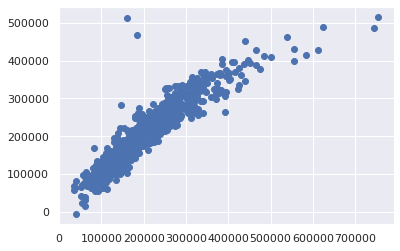

In [381]:
# let's see whether the predictions are lying on the diagonal
plt.scatter(y,y_pred)

Seems to be nice. Still, assumptions should be tested matematically

In [383]:
# Residuals (error between actual and predicted) should be around 0. So, average should be 0.

(y-y_pred).mean()

-1.2375417162268741e-08

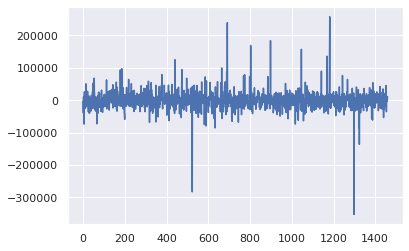

In [384]:
# They should form a white noise. (References). 
plt.plot((y-y_pred))

In [385]:
resid=y-y_pred

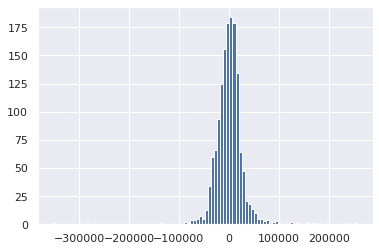

In [388]:
# And they should follow normal distribution
plt.hist(resid,bins=100);

Too high pike. Kinda normal, but we cant say without testing the correct hypothesis

# References:
1. Dummies trap: https://www.algosome.com/articles/dummy-variable-trap-regression.html
2. White noise: https://en.wikipedia.org/wiki/White_noise#White_noise_vector
3. Multiple Linear Regression - for math lovers by Cornnell Uni: http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf
4. Nice overview and step-by-step project, but in R. But yeah, you can google same functions for Python: https://towardsdatascience.com/linear-regression-modeling-and-assumptions-dcd7a201502a
5. Amazing review of assumptions (It might confuse you even more in fact. But at some point pls review it. You can find some really interesting links and yeah, very ugly presentations for students of psychology faculty): https://en.wikiversity.org/wiki/Multiple_linear_regression
